# Audit Fraud Detection Project

In this notebook, we aim to detect potential fraud or high-risk audits using a dataset of audit indicators.  
We'll apply various machine learning and deep learning classification models to predict whether a given audit case is fraudulent (Risk = 1) or normal (Risk = 0).

We will:
- Explore and clean the data
- Prepare it for modeling
- Train and evaluate multiple models (Logistic Regression, Random Forest, KNN, MLP, etc.)
- Compare their performances

## Step 1: Import required libraries

We start by importing the necessary Python libraries for data manipulation, visualization, and machine learning.

In [78]:
!python3 -m pip install tensorflow-macos tensorflow-metal

error: externally-managed-environment

× This environment is externally managed
╰─> To install Python packages system-wide, try brew install
    xyz, where xyz is the package you are trying to
    install.
    
    If you wish to install a Python library that isn't in Homebrew,
    use a virtual environment:
    
    python3 -m venv path/to/venv
    source path/to/venv/bin/activate
    python3 -m pip install xyz
    
    If you wish to install a Python application that isn't in Homebrew,
    it may be easiest to use 'pipx install xyz', which will manage a
    virtual environment for you. You can install pipx with
    
    brew install pipx
    
    You may restore the old behavior of pip by passing
    the '--break-system-packages' flag to pip, or by adding
    'break-system-packages = true' to your pip.conf file. The latter
    will permanently disable this error.
    
    If you disable this error, we STRONGLY recommend that you additionally
    pass the '--user' flag to pip, or set 

In [79]:
!python3 -m pip install "numpy<2.0"

error: externally-managed-environment

× This environment is externally managed
╰─> To install Python packages system-wide, try brew install
    xyz, where xyz is the package you are trying to
    install.
    
    If you wish to install a Python library that isn't in Homebrew,
    use a virtual environment:
    
    python3 -m venv path/to/venv
    source path/to/venv/bin/activate
    python3 -m pip install xyz
    
    If you wish to install a Python application that isn't in Homebrew,
    it may be easiest to use 'pipx install xyz', which will manage a
    virtual environment for you. You can install pipx with
    
    brew install pipx
    
    You may restore the old behavior of pip by passing
    the '--break-system-packages' flag to pip, or by adding
    'break-system-packages = true' to your pip.conf file. The latter
    will permanently disable this error.
    
    If you disable this error, we STRONGLY recommend that you additionally
    pass the '--user' flag to pip, or set 

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, roc_auc_score)
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

## Step 2: Load the dataset

We load our audit dataset and inspect its structure (columns, shape, and data types).

In [81]:
fraud_audit = Path("/Users/sarahzhf/Library/Mobile Documents/com~apple~CloudDocs/MASTERS/m2/intermediate dl/final project /fraud audit DL/audit_data.csv.xls")

In [82]:
df = pd.read_csv(fraud_audit)

In [83]:
df.columns

Index(['Sector_score', 'LOCATION_ID', 'PARA_A', 'Score_A', 'Risk_A', 'PARA_B',
       'Score_B', 'Risk_B', 'TOTAL', 'numbers', 'Score_B.1', 'Risk_C',
       'Money_Value', 'Score_MV', 'Risk_D', 'District_Loss', 'PROB', 'RiSk_E',
       'History', 'Prob', 'Risk_F', 'Score', 'Inherent_Risk', 'CONTROL_RISK',
       'Detection_Risk', 'Audit_Risk', 'Risk'],
      dtype='object')

In [84]:
df.head(10)


,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,...,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
0,3.89,23,4.18,0.6,2.508,2.50,0.2,0.500,6.68,5.0,...,0.4,0,0.2,0.0,2.4,8.574,0.4,0.5,1.7148,1
1,3.89,6,0.00,0.2,0.000,4.83,0.2,0.966,4.83,5.0,...,0.4,0,0.2,0.0,2.0,2.554,0.4,0.5,0.5108,0
2,3.89,6,0.51,0.2,0.102,0.23,0.2,0.046,0.74,5.0,...,0.4,0,0.2,0.0,2.0,1.548,0.4,0.5,0.3096,0
3,3.89,6,0.00,0.2,0.000,10.80,0.6,6.480,10.80,6.0,...,0.4,0,0.2,0.0,4.4,17.530,0.4,0.5,3.5060,1
4,3.89,6,0.00,0.2,0.000,0.08,0.2,0.016,0.08,5.0,...,0.4,0,0.2,0.0,2.0,1.416,0.4,0.5,0.2832,0
5,3.89,6,0.00,0.2,0.000,0.83,0.2,0.166,0.83,5.0,...,0.4,0,0.2,0.0,2.0,2.156,0.4,0.5,0.4312,0
6,3.89,7,1.10,0.4,0.440,7.41,0.4,2.964,8.51,5.0,...,0.4,0,0.2,0.0,3.2,31.774,0.4,0.5,6.3548,1
7,3.89,8,8.50,0.6,5.100,12.03,0.6,7.218,20.53,5.5,...,0.4,0,0.2,0.0,4.2,18.034,0.4,0.5,3.6068,1
8,3.89,8,8.40,0.6,5.040,11.05,0.6,6.630,19.45,5.5,...,0.4,0,0.2,0.0,4.2,17.206,0.4,0.5,3.4412,1
9,3.89,8,3.98,0.6,2.388,0.99,0.2,0.198,4.97,5.0,...,0.4,0,0.2,0.0,2.4,4.372,0.4,0.5,0.8744,0


In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 776 entries, 0 to 775
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sector_score    776 non-null    float64
 1   LOCATION_ID     776 non-null    object 
 2   PARA_A          776 non-null    float64
 3   Score_A         776 non-null    float64
 4   Risk_A          776 non-null    float64
 5   PARA_B          776 non-null    float64
 6   Score_B         776 non-null    float64
 7   Risk_B          776 non-null    float64
 8   TOTAL           776 non-null    float64
 9   numbers         776 non-null    float64
 10  Score_B.1       776 non-null    float64
 11  Risk_C          776 non-null    float64
 12  Money_Value     775 non-null    float64
 13  Score_MV        776 non-null    float64
 14  Risk_D          776 non-null    float64
 15  District_Loss   776 non-null    int64  
 16  PROB            776 non-null    float64
 17  RiSk_E          776 non-null    flo

In [86]:
df.describe()

,Sector_score,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,Score_B.1,...,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
count,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,...,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.0,776.000000,776.000000
mean,20.184536,2.450194,0.351289,1.351029,10.799988,0.313144,6.334008,13.218481,5.067655,0.223711,...,0.519072,0.104381,0.216753,0.053608,2.702577,17.680612,0.572680,0.5,7.168158,0.393041
std,24.319017,5.678870,0.174055,3.440447,50.083624,0.169804,30.072845,51.312829,0.264449,0.080352,...,0.290312,0.531031,0.067987,0.305835,0.858923,54.740244,0.444581,0.0,38.667494,0.488741
min,1.850000,0.000000,0.200000,0.000000,0.000000,0.200000,0.000000,0.000000,5.000000,0.200000,...,0.400000,0.000000,0.200000,0.000000,2.000000,1.400000,0.400000,0.5,0.280000,0.000000
25%,2.370000,0.210000,0.200000,0.042000,0.000000,0.200000,0.000000,0.537500,5.000000,0.200000,...,0.400000,0.000000,0.200000,0.000000,2.000000,1.583500,0.400000,0.5,0.316700,0.000000
50%,3.890000,0.875000,0.200000,0.175000,0.405000,0.200000,0.081000,1.370000,5.000000,0.200000,...,0.400000,0.000000,0.200000,0.000000,2.400000,2.214000,0.400000,0.5,0.555600,0.000000
75%,55.570000,2.480000,0.600000,1.488000,4.160000,0.400000,1.840500,7.707500,5.000000,0.200000,...,0.400000,0.000000,0.200000,0.000000,3.250000,10.663500,0.400000,0.5,3.249900,1.000000
max,59.850000,85.000000,0.600000,51.000000,1264.630000,0.600000,758.778000,1268.910000,9.000000,0.600000,...,2.400000,9.000000,0.600000,5.400000,5.200000,801.262000,5.800000,0.5,961.514400,1.000000


## Step 3: Exploratory Data Analysis (EDA)

Here, we quickly analyze:
- the number of missing values,
- the main statistics of numeric columns,
- and the distribution of the target variable `Risk`.

In [87]:
df.isnull().sum()

Sector_score      0
LOCATION_ID       0
PARA_A            0
Score_A           0
Risk_A            0
PARA_B            0
Score_B           0
Risk_B            0
TOTAL             0
numbers           0
Score_B.1         0
Risk_C            0
Money_Value       1
Score_MV          0
Risk_D            0
District_Loss     0
PROB              0
RiSk_E            0
History           0
Prob              0
Risk_F            0
Score             0
Inherent_Risk     0
CONTROL_RISK      0
Detection_Risk    0
Audit_Risk        0
Risk              0
dtype: int64

We can see that the dataset is mostly complete (few or no missing values).  

In [88]:
target = 'Risk'
df[target].value_counts(normalize=True) * 100

Risk
0    60.695876
1    39.304124
Name: proportion, dtype: float64

/var/folders/rm/rnkty4g54qj41th_h13bs56m0000gn/T/ipykernel_78110/3706061468.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x="Risk", data=df, palette = "pink")


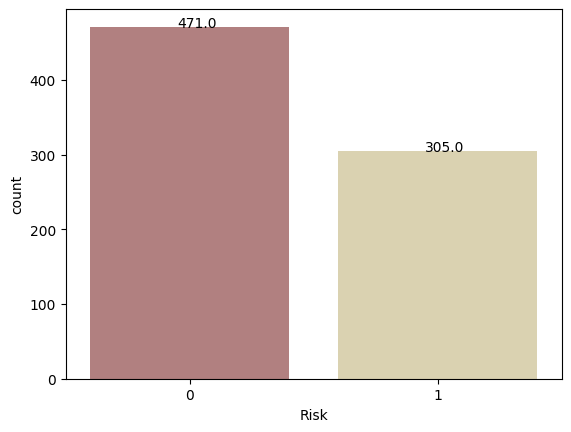

In [89]:
ax = sns.countplot(x="Risk", data=df, palette = "pink")
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.35, p.get_height()+0.01))
plt.show()

The target variable `Risk` is slightly imbalanced, which is typical for fraud detection problems.

## Step 4: Data Cleaning and Preprocessing

In this section, we clean and prepare the dataset before training our models.

Goals:
- Drop irrelevant or duplicate columns such as `LOCATION_ID` and `Score_B.1`
- Keep only numeric variables for easier model training
- Split the dataset into training and test sets (80/20)
- Normalize (scale) the numeric features using `StandardScaler`  
  → This ensures all features are on the same scale, improving model stability and convergence.

In [90]:
df = df.fillna(df.mean(numeric_only=True))

In [91]:
to_drop = []
for col in df.columns:
    if col.lower().endswith("_id") or col.lower() == "location_id":
        to_drop.append(col)
if "Score_B.1" in df.columns:
    to_drop.append("Score_B.1")

df = df.drop(columns=to_drop, errors="ignore")

# Keep numeric only
num_df = df.select_dtypes(include=[np.number])

X = num_df.drop(columns=["Risk"])
y = num_df["Risk"].astype(int)

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Scale
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

After this step, our data is:
- Cleaned and ready for modeling  
- Split into training and test subsets  
- Scaled for consistent feature magnitudes  

We can now move on to training our classification models.

## Step 5: Model Training & Evaluation

In this section, we will:
- Define a function to evaluate our models (accuracy, precision, recall, f1, roc_auc)
- Train differents classification algorithms
- Compare their performances

In [92]:
def evaluate_model(name, y_true, y_proba):
    y_pred = (y_proba >= 0.5).astype(int)
    return {
        "model": name,
        "accuracy": accuracy_score(y_true, y_pred),
        "precision": precision_score(y_true, y_pred, zero_division=0),
        "recall": recall_score(y_true, y_pred, zero_division=0),
        "f1": f1_score(y_true, y_pred, zero_division=0),
        "roc_auc": roc_auc_score(y_true, y_proba)
    }

In [93]:
dummy = DummyClassifier(strategy="most_frequent")
dummy.fit(X_train_scaled, y_train)
y_proba = dummy.predict_proba(X_test_scaled)[:, 1]
metrics_dummy = evaluate_model("Dummy Classifier", y_test, y_proba)
metrics_dummy

{'model': 'Dummy Classifier',
 'accuracy': 0.6089743589743589,
 'precision': 0.0,
 'recall': 0.0,
 'f1': 0.0,
 'roc_auc': 0.5}

### Dummy Classifier — Results Interpretation

The Dummy Classifier, which always predicts the majority class, achieves an accuracy of around 61% but completely fails to detect any fraud cases (precision, recall, and F1 are all 0).  
This confirms that the dataset is imbalanced, and random or naive predictions are not effective.

In [94]:
logreg = LogisticRegression(max_iter=300)
logreg.fit(X_train_scaled, y_train)
y_proba = logreg.predict_proba(X_test_scaled)[:, 1]
metrics_logreg = evaluate_model("Logistic Regression", y_test, y_proba)
metrics_logreg

{'model': 'Logistic Regression',
 'accuracy': 0.9807692307692307,
 'precision': 1.0,
 'recall': 0.9508196721311475,
 'f1': 0.9747899159663865,
 'roc_auc': 0.999137187230371}

### Logistic Regression — Results Interpretation

The Logistic Regression model performs extremely well on this dataset.

- It achieves 98% accuracy, meaning almost all audit cases are correctly classified.
- The precision (1.00) shows that every predicted fraud is indeed a real fraud.
- The recall (0.95) indicates that the model successfully detects almost all fraud cases.
- The ROC-AUC (0.999) suggests an almost perfect ability to separate fraud and non-fraud cases.

These results are excellent, but such high performance might also indicate that the dataset is very clean or not very challenging.  
Further validation or cross-validation would help confirm if the model generalizes well.

In [95]:
poly_log = Pipeline([
    ("poly", PolynomialFeatures(degree=2, include_bias=False)),
    ("scaler", StandardScaler(with_mean=False)),
    ("logreg", LogisticRegression(max_iter=300))
])
poly_log.fit(X_train, y_train)
y_proba = poly_log.predict_proba(X_test)[:, 1]
metrics_poly = evaluate_model("Polynomial Logistic (deg=2)", y_test, y_proba)
metrics_poly

{'model': 'Polynomial Logistic (deg=2)',
 'accuracy': 0.9871794871794872,
 'precision': 1.0,
 'recall': 0.9672131147540983,
 'f1': 0.9833333333333333,
 'roc_auc': 0.9998274374460742}

### Polynomial Logistic Regression — Results Interpretation

Adding polynomial features (degree = 2) slightly improves the model compared to the simple logistic regression.

- Accuracy increases to 98.7%, and the model keeps a perfect precision (1.00).  
- The recall (0.97) shows that it detects almost all fraudulent cases.
- The ROC-AUC score (0.9998) indicates an almost perfect separation between classes.

However, the improvement is minor, which means that the relationships in the data are mostly linear.  
The model remains very accurate but could be slightly overfitted given the almost perfect results.

In [96]:
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)
y_proba = tree.predict_proba(X_test)[:, 1]
metrics_tree = evaluate_model("Decision Tree", y_test, y_proba)
metrics_tree

{'model': 'Decision Tree',
 'accuracy': 1.0,
 'precision': 1.0,
 'recall': 1.0,
 'f1': 1.0,
 'roc_auc': 1.0}

### Decision Tree — Results Interpretation

The Decision Tree model achieves a perfect score on all metrics (accuracy, precision, recall, F1, and ROC-AUC = 1.0).  
This means that it classifies every audit case correctly on the test set.

However, such perfect performance is unusual and suggests that the model might be overfitting.  
Decision Trees tend to memorize the training data when their depth is not limited (`max_depth=None`).  
**In a real scenario, this model might not generalize well to new unseen data**.

To confirm this, it would be useful to:
- limit the tree depth (e.g. `max_depth=5` or `max_depth=10`),
- or compare its performance using cross-validation.

In [97]:
# Vérifier si c’est bien de l’overfitting
tree_5 = DecisionTreeClassifier(max_depth=5, random_state=42)
tree_5.fit(X_train, y_train)
y_proba = tree_5.predict_proba(X_test)[:, 1]
evaluate_model("Decision Tree (max_depth=5)", y_test, y_proba)

{'model': 'Decision Tree (max_depth=5)',
 'accuracy': 1.0,
 'precision': 1.0,
 'recall': 1.0,
 'f1': 1.0,
 'roc_auc': 1.0}

### Decision Tree (max_depth=5) — Results Interpretation 2

Even when limiting the tree depth to 5, the model still reaches perfect performance on all metrics.  
This suggests that the dataset is highly separable and the variables clearly distinguish between fraud and non-fraud cases.

In a real audit case, this perfect scores are extremely rare, so this probably indicates that the dataset is too clean or synthetic.  
Still, this confirms that even a shallow model can achieve excellent accuracy here.

In [98]:
rf = RandomForestClassifier(
    n_estimators=300,
    random_state=42,
    class_weight="balanced"   
)

rf.fit(X_train, y_train)  
y_proba_rf = rf.predict_proba(X_test)[:, 1]  

metrics_rf = evaluate_model("Random Forest", y_test, y_proba_rf)
metrics_rf

{'model': 'Random Forest',
 'accuracy': 1.0,
 'precision': 1.0,
 'recall': 1.0,
 'f1': 1.0,
 'roc_auc': 1.0}

### Random Forest — Results Interpretation

The Random Forest model achieves perfect scores on all metrics (1.0).  
This confirms the trend observed with the Decision Tree: the dataset is perfectly separable.
  
The model detects all fraud cases without any false positives.

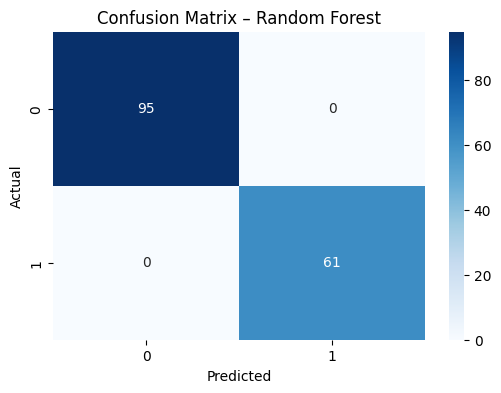

In [99]:
cm = confusion_matrix(y_test, rf.predict(X_test))

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix – Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [100]:
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(X_train_scaled, y_train)
y_proba = knn.predict_proba(X_test_scaled)[:, 1]
metrics_knn = evaluate_model("KNN (k=11)", y_test, y_proba)
metrics_knn

{'model': 'KNN (k=11)',
 'accuracy': 0.967948717948718,
 'precision': 1.0,
 'recall': 0.9180327868852459,
 'f1': 0.9572649572649573,
 'roc_auc': 0.9946505608283003}

### KNN (k = 11) — Results Interpretation

The K-Nearest Neighbors model reaches an accuracy of 96.8%, which is slightly lower than the tree-based models but still very strong.  
It shows a perfect precision (1.00), meaning there are no false positives, but the recall (0.92) is a bit lower, a few fraud cases were not detected.

KNN relies on distance between samples, so it can be sensitive to the data distribution or scaling.  
Overall, it performs very well and confirms that the dataset is easy to model, but it is slightly less flexible than the Random Forest or Logistic Regression.

In [106]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.utils.class_weight import compute_class_weight

input_dim = X_train_scaled.shape[1]

mlp = keras.Sequential([
    layers.Input(shape=(input_dim,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

mlp.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
mlp.summary()

# Compute class weights to handle class imbalance
classes = np.unique(y_train)
cw = compute_class_weight(class_weight='balanced', classes=classes, y=y_train)
cw = {int(c): w for c, w in zip(classes, cw)}

history = mlp.fit(
    X_train_scaled, y_train,
    validation_split=0.2,
    epochs=40,
    batch_size=32,
    class_weight=cw,
    verbose=1
)

y_proba_mlp = mlp.predict(X_test_scaled).ravel()
metrics_mlp = evaluate_model("MLP", y_test, y_proba_mlp)
metrics_mlp

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 64)             │         1,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,713 (14.50 KB)

 Trainable params: 3,713 (14.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/40
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.8317 - loss: 0.4369 - val_accuracy: 0.9435 - val_loss: 0.2183
Epoch 2/40
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9461 - loss: 0.2137 - val_accuracy: 0.9597 - val_loss: 0.1464
Epoch 3/40
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9676 - loss: 0.1458 - val_accuracy: 0.9516 - val_loss: 0.1189
Epoch 4/40
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9770 - loss: 0.1166 - val_accuracy: 0.9516 - val_loss: 0.1026
Epoch 5/40
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9726 - loss: 0.1140 - val_accuracy: 0.9597 - val_loss: 0.0933
Epoch 6/40
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9688 - loss: 0.0875 - val_accuracy: 0.9597 - val_loss: 0.0870
Epoch 7/40
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9790 - loss: 0.0839 - val_accuracy: 0.9597 - val_loss: 0.0822
Epoch 8/40
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9749 - loss: 0.0802 - val_accuracy: 0.9677 - v

{'model': 'MLP',
 'accuracy': 0.9871794871794872,
 'precision': 0.9836065573770492,
 'recall': 0.9836065573770492,
 'f1': 0.9836065573770492,
 'roc_auc': 0.9996548748921484}

### MLP (Deep Learning) — Results Interpretation

The MLP achieves very strong performance on this dataset, with almost perfect precision and recall (both around 0.98).  
This means the network correctly identifies almost all fraud cases and rarely makes mistakes when predicting a fraud.

The ROC-AUC score is also extremely high (0.9996), which indicates that the model separates the two classes almost perfectly.

However, the improvement compared to the classical models (Logistic Regression, Random Forest, etc.) is minimal.  
This suggests that the dataset is easy to separate and highly structured.  
In this context, a neural network does not bring a major advantage compared to simpler models.

Overall, the MLP confirms the same conclusion: the features already contain enough information to detect fraud very accurately.

In [107]:
results = pd.DataFrame([
    metrics_dummy,
    metrics_logreg,
    metrics_poly,
    metrics_tree,
    metrics_knn,
    metrics_rf,
    metrics_mlp
])

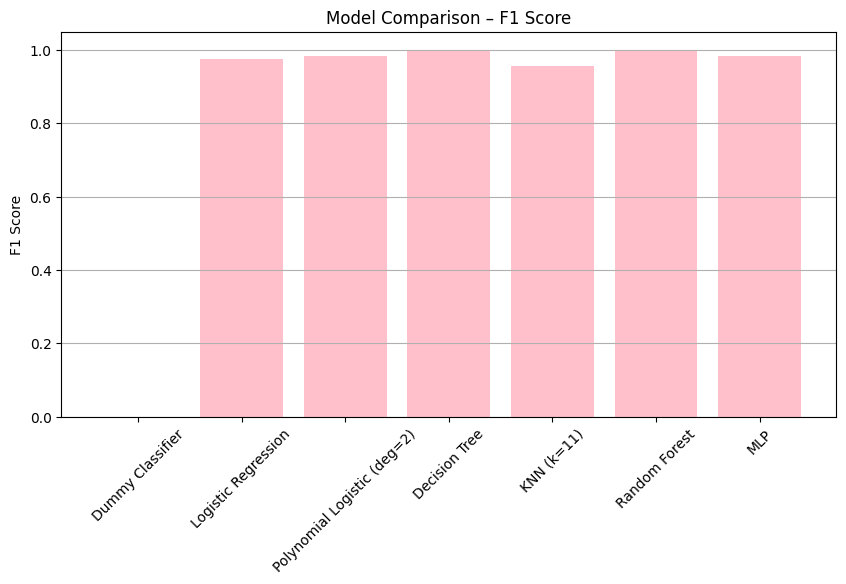

In [108]:
plt.figure(figsize=(10,5))
plt.bar(results['model'], results['f1'], color='pink')
plt.xticks(rotation=45)
plt.ylabel("F1 Score")
plt.title("Model Comparison – F1 Score")
plt.grid(axis='y')
plt.show()

Although the dataset was chosen independently, its structure turned out to be highly separable. 
This explains why many models achieve near-perfect accuracy. 
Instead of being a limitation, this allowed me to focus on model comparison, preprocessing strategies, 
and the specific behavior of algorithms (e.g., scaling vs no scaling for tree-based models). 
I also discuss the limits of such a clean dataset and what would be needed for a more realistic fraud detection setting.